In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
x_train = np.array(train_df.drop(['label'], axis=1))
y_train = np.array(train_df['label'])

In [4]:
x_test = np.array(test_df.drop(['label'], axis=1))
y_test = np.array(test_df['label'])

In [5]:
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']

In [6]:
np.unique(y_train)
y_train[:25]

array([ 3,  6,  2,  2, 13, 16,  8, 22,  3,  3, 18, 10, 16, 22, 20, 16, 17,
       13, 13, 19, 18, 21, 16, 23,  3], dtype=int64)

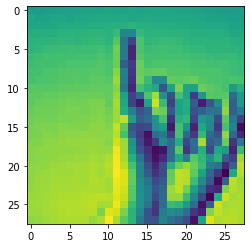

In [7]:
plt.imshow(x_train[6].reshape(28,28))

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train[6]

array([0.5254902 , 0.5254902 , 0.52941176, 0.52941176, 0.53333333,
       0.5372549 , 0.5372549 , 0.54117647, 0.54117647, 0.54117647,
       0.54509804, 0.54117647, 0.54117647, 0.54509804, 0.54117647,
       0.54509804, 0.54509804, 0.54509804, 0.54509804, 0.54117647,
       0.54117647, 0.54117647, 0.5372549 , 0.53333333, 0.52941176,
       0.5254902 , 0.5254902 , 0.5254902 , 0.54509804, 0.5372549 ,
       0.54117647, 0.54509804, 0.54509804, 0.54117647, 0.54901961,
       0.54901961, 0.55294118, 0.55686275, 0.55686275, 0.55294118,
       0.55686275, 0.55294118, 0.55294118, 0.55686275, 0.55294118,
       0.55294118, 0.55294118, 0.54901961, 0.54901961, 0.54901961,
       0.54509804, 0.54117647, 0.54117647, 0.5372549 , 0.53333333,
       0.52941176, 0.55294118, 0.55294118, 0.55294118, 0.55294118,
       0.56078431, 0.56078431, 0.56078431, 0.56078431, 0.56470588,
       0.56470588, 0.56862745, 0.56862745, 0.56862745, 0.58039216,
       0.56862745, 0.56862745, 0.56470588, 0.56470588, 0.56470

In [10]:
y_train[6]

8

# Building Model

In [11]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='sigmoid'),
    keras.layers.Dense(50, activation='gelu'),
    keras.layers.Dense(25, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
858/858 [==============================] - 3s 2ms/step - loss: 1.9854 - accuracy: 0.4018
Epoch 2/10
858/858 [==============================] - 2s 2ms/step - loss: 1.0356 - accuracy: 0.6772
Epoch 3/10
858/858 [==============================] - 2s 2ms/step - loss: 0.7080 - accuracy: 0.7804
Epoch 4/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5070 - accuracy: 0.8485
Epoch 5/10
858/858 [==============================] - 2s 2ms/step - loss: 0.3597 - accuracy: 0.8968
Epoch 6/10
858/858 [==============================] - 2s 2ms/step - loss: 0.2471 - accuracy: 0.9338
Epoch 7/10
858/858 [==============================] - 2s 2ms/step - loss: 0.1732 - accuracy: 0.9578
Epoch 8/10
858/858 [==============================] - 2s 2ms/step - loss: 0.1268 - accuracy: 0.9712
Epoch 9/10
858/858 [==============================] - 2s 2ms/step - loss: 0.1027 - accuracy: 0.9761
Epoch 10/10
858/858 [==============================] - 2s 2ms/step - loss: 0.0881 - accuracy: 0.9776

In [12]:
model.evaluate(x_test, y_test)

225/225 [==============================] - 1s 2ms/step - loss: 1.0388 - accuracy: 0.7630


[1.0388340950012207, 0.7629671096801758]

In [13]:
y_predicted = model.predict(x_test)

225/225 [==============================] - 0s 1ms/step


In [14]:
y_predicted[0]

array([1.05405712e-15, 8.75775563e-10, 3.84557337e-01, 6.71100046e-04,
       6.30516028e-10, 3.10313731e-01, 9.99999642e-01, 6.66458011e-01,
       2.86445416e-11, 9.21874835e-06, 2.69981756e-05, 1.00337239e-02,
       1.01280784e-04, 9.94654556e-07, 9.24302638e-01, 6.14793462e-05,
       9.31481004e-01, 6.03604065e-07, 1.94389920e-03, 6.22889042e-01,
       5.79525361e-09, 3.51827115e-01, 1.30016691e-04, 8.66928101e-01,
       2.22511809e-12], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

6

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(25, 25), dtype=int32, numpy=
array([[329,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  0, 370,   0,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  14,   0,   0,  27,   0,  10,   0,   0],
       [  0,   0, 288,   0,   0,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   1,   0, 216,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   8,   0,  20,   0],
       [  0,   0,   0,   0, 435,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  63,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 246,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 280,  25,   0,   0,   0,   0,   0,
          0,   0,   0,  35,

Text(114.0, 0.5, 'Truth')

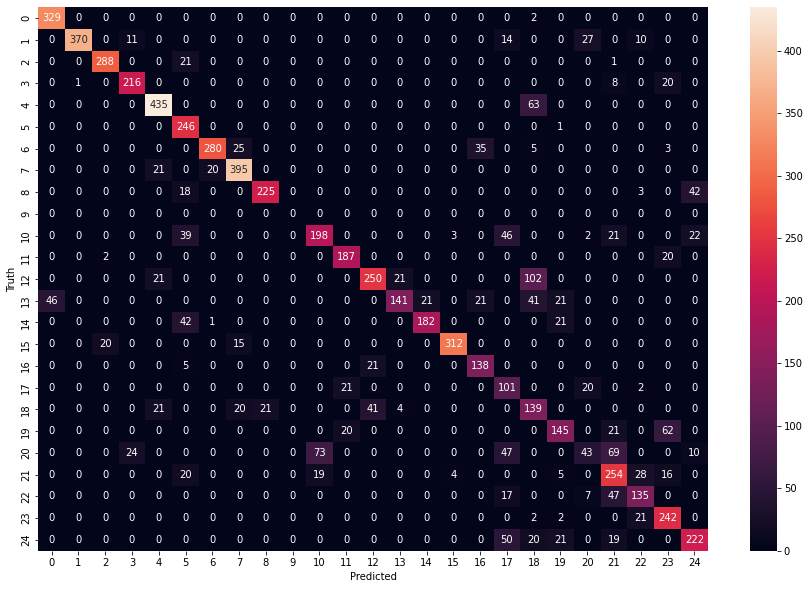

In [18]:
#Showing Hitmap

plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')